In [3]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/functions.cc","k")

Info in <ACLiC>: unmodified script has already been compiled and loaded
Info in <ACLiC>: unmodified script has already been compiled and loaded


In [67]:
file = ROOT.TFile("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/TMVA_tutorials/test.root", "READ")
#print(file, type(file))
print(type(file.Get("dataset").Get("TestTree")))

df = ROOT.RDataFrame(file.Get("dataset").Get("TestTree"))
df = (df.Define("HCandMass_GEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta_GEN, goodMeson_phi_GEN, goodMeson_mass_GEN, goodPhotons_pt_GEN, goodPhotons_eta_GEN, goodPhotons_phi_GEN, 0)")
        .Define("HCandMass_varGEN", "compute_HiggsVars_var(goodMeson_pt_GEN, goodMeson_eta, goodMeson_phi, goodMeson_mass, goodPhotons_pt, goodPhotons_eta, goodPhotons_phi, 0)")
        .Define("HCandMass_varPRED", "compute_HiggsVars_var(BDTG_d3, goodMeson_eta, goodMeson_phi, goodMeson_mass, goodPhotons_pt, goodPhotons_eta, goodPhotons_phi, 0)"))

<class cppyy.gbl.TTree at 0x560983ad0350>


In [68]:
cols = ["goodMeson_pt", "BDTG_d3", "goodMeson_pt_GEN", "HCandMass"]
x = df.AsNumpy(columns=cols)
pddf = pd.DataFrame(x)
display(pddf)

,goodMeson_pt,BDTG_d3,goodMeson_pt_GEN,HCandMass
0,43.743580,46.399185,45.857006,120.539963
1,62.468258,61.317501,64.624611,123.184616
2,53.195007,59.481281,58.278316,119.776680
3,165.765060,188.031052,191.249039,116.395874
4,72.613968,71.915207,74.058876,123.927956
...,...,...,...,...
14637,60.659973,61.340870,61.514862,124.072411
14638,86.754921,84.111267,85.872765,126.239120
14639,43.495346,46.500103,44.962479,122.552910
14640,59.925152,62.585342,61.983757,120.873657


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


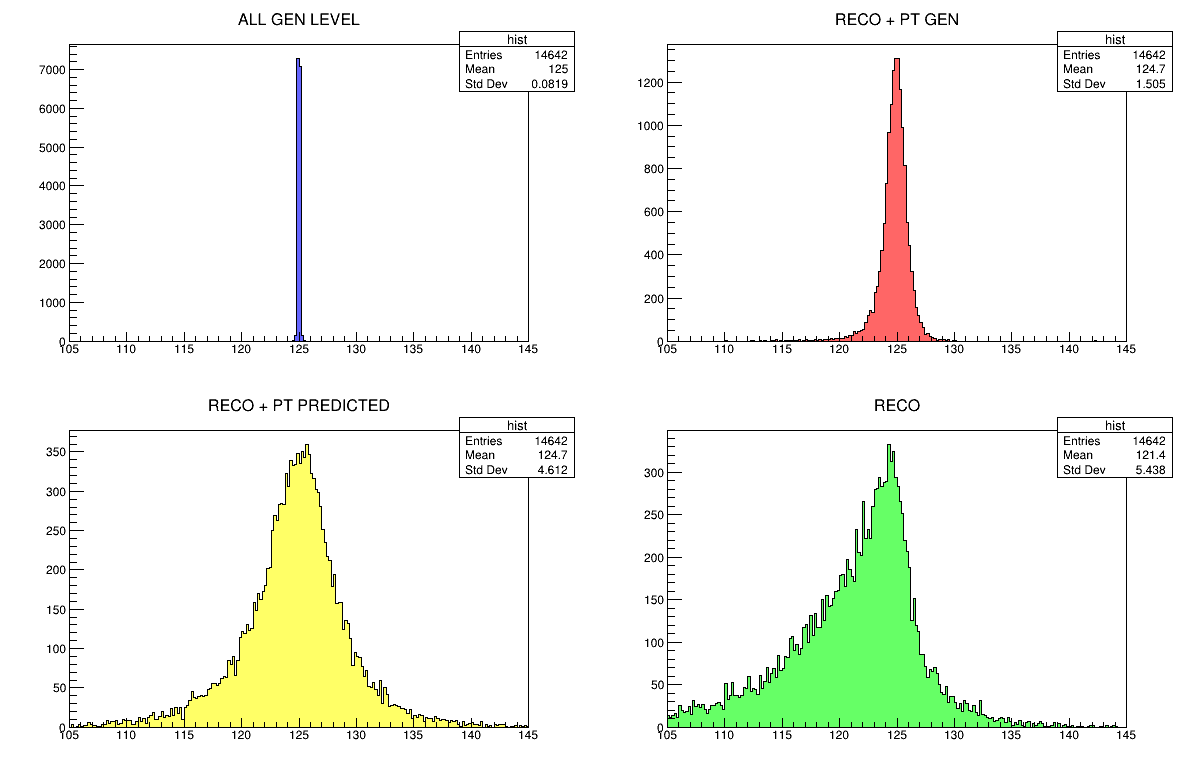

In [69]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)
canvas.Divide(2, 2)

nbins, xlow, xhigh = 200, 105, 145

h1 = df.Histo1D(("hist", "ALL GEN LEVEL", nbins, xlow, xhigh), "HCandMass_GEN")
h2 = df.Histo1D(("hist", "RECO + PT GEN", nbins, xlow, xhigh), "HCandMass_varGEN")
h3 = df.Histo1D(("hist", "RECO + PT PREDICTED", nbins, xlow, xhigh), "HCandMass_varPRED")
h4 = df.Histo1D(("hist", "RECO", nbins, xlow, xhigh), "HCandMass")

h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kRed-7)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kYellow-7)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kGreen-7)
h4.SetLineColor(ROOT.kBlack)


p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
h4.Draw("hist")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


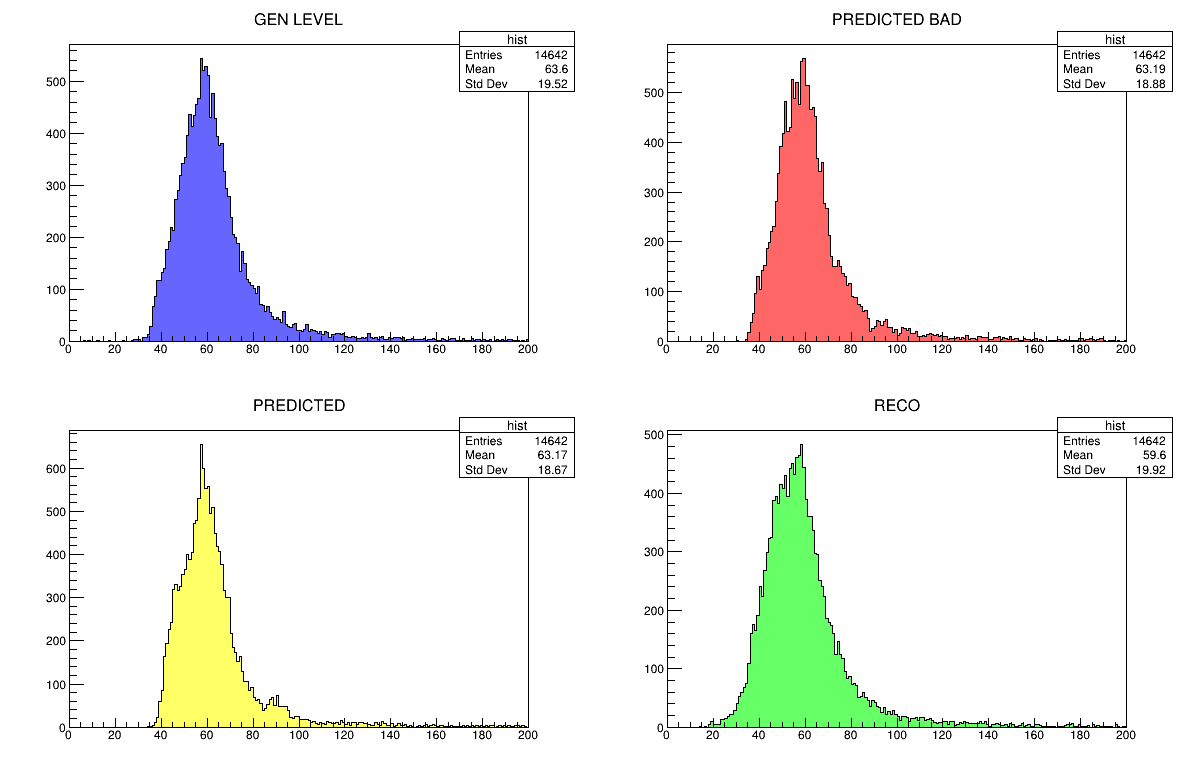

In [70]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 800)
canvas.Divide(2, 2)

nbins, xlow, xhigh = 200, 0, 200

h1 = df.Histo1D(("hist", "GEN LEVEL", nbins, xlow, xhigh), "goodMeson_pt_GEN")
h2 = df.Histo1D(("hist", "PREDICTED BAD", nbins, xlow, xhigh), "BDTG_d3")
h3 = df.Histo1D(("hist", "PREDICTED", nbins, xlow, xhigh), "BDTG_depth4_with_pruning")
h4 = df.Histo1D(("hist", "RECO", nbins, xlow, xhigh), "goodMeson_pt")

h1.SetFillColor(ROOT.kBlue-7)
h1.SetLineColor(ROOT.kBlack)
h2.SetFillColor(ROOT.kRed-7)
h2.SetLineColor(ROOT.kBlack)
h3.SetFillColor(ROOT.kYellow-7)
h3.SetLineColor(ROOT.kBlack)
h4.SetFillColor(ROOT.kGreen-7)
h4.SetLineColor(ROOT.kBlack)


p = canvas.cd(1)
h1.Draw("hist")
p = canvas.cd(2)
h2.Draw("hist")
p = canvas.cd(3)
h3.Draw("hist")
p = canvas.cd(4)
h4.Draw("hist")

canvas.Draw()